In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline
from warnings import filterwarnings
filterwarnings ('ignore')

In [2]:
#Import the training dataset
data= pd.read_csv('C:/Users/Sanjay/Downloads/train_CloudCondition.csv')
data.head(5)

,Day,Cloud_Condition,Rain_OR_SNOW,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Condensation,Solar irradiance intensity
0,1,Partly Cloudy,rain,-13,-19.0,0.134364,17.0,68.0,4.0,1008.0,Frost,1068
1,2,Partly Cloudy,rain,15,5.0,0.847434,8.0,291.0,2.0,1036.0,Frost,1291
2,3,Partly Cloudy,rain,33,-12.0,0.763775,32.0,32.0,8.0,1004.0,Dry,1433
3,4,Partly Cloudy,snow,30,36.0,0.255069,15.0,130.0,3.0,1016.0,Dry,1410
4,5,Partly Cloudy,snow,27,30.0,0.495435,63.0,60.0,15.0,1007.0,Fog,1391


In [3]:
data['Cloud_Condition'].unique()

array(['Partly Cloudy', 'Light Rain', 'Breezy and Dry', 'Overcast',
       'Foggy', 'Breezy and Mostly Cloudy', 'Clear',
       'Breezy and Partly Cloudy', 'Breezy and Overcast',
       'Humid and Mostly Cloudy', 'Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy'], dtype=object)

In [4]:
# Statistic Summary

In [5]:
def stats(data):
    stats= pd.DataFrame(data.dtypes, columns=['DataType'])
    stats['Missing_value']= data.isnull().sum().values
    stats['Unique_value']= data.nunique().values
    stats=stats.reset_index()
    return stats

In [6]:
stats(data)

,index,DataType,Missing_value,Unique_value
0,Day,int64,0,71428
1,Cloud_Condition,object,0,26
2,Rain_OR_SNOW,object,115,2
3,Temperature (C),object,252,123
4,Apparent Temperature (C),float64,3,66
5,Humidity,float64,1,71427
6,Wind Speed (km/h),float64,2,64
7,Wind Bearing (degrees),float64,37,360
8,Visibility (km),float64,20,17
9,Pressure (millibars),float64,65,47


In [7]:
for col in data.columns:
    print(col)
    print(data[col].unique())

Day
[    1     2     3 ... 79998 79999 80000]
Cloud_Condition
['Partly Cloudy' 'Light Rain' 'Breezy and Dry' 'Overcast' 'Foggy'
 'Breezy and Mostly Cloudy' 'Clear' 'Breezy and Partly Cloudy'
 'Breezy and Overcast' 'Humid and Mostly Cloudy' 'Mostly Cloudy'
 'Humid and Partly Cloudy' 'Windy and Foggy' 'Windy and Overcast'
 'Breezy and Foggy' 'Windy and Partly Cloudy' 'Breezy'
 'Dry and Partly Cloudy' 'Windy and Mostly Cloudy'
 'Dangerously Windy and Partly Cloudy' 'Dry' 'Windy' 'Humid and Overcast'
 'Drizzle' 'Windy and Dry' 'Dry and Mostly Cloudy']
Rain_OR_SNOW
['rain' 'snow' nan]
Temperature (C)
['-13' '15' '33' '30' '27' '-17' '-5' '-14' '10' '7' '9' '20' '3' '29'
 '-8' '-15' '-20' '36' '32' '6' '17' '28' '-21' '23' '-4' '25' '-7' '16'
 '39' '-1' '13' '35' '22' '12' '14' '1' '8' '-3' '38' '5' '37' '-10' '19'
 '34' '26' '0' '24' '11' '21' '-9' '-2' '4' '-19' '-6' '2' '-16' '-11'
 '18' '31' '-18' '-12' nan '-' 16 30 17 -13 36 4 9 10 13 27 -8 -16 34 2
 -11 -9 -10 -5 39 14 7 20 -3 15 24 3

In [8]:
# Handling the missing values

In [9]:
data['Temperature (C)']= data['Temperature (C)'].replace(to_replace='-', value= np.nan)

In [10]:
data['Temperature (C)'].unique()

array(['-13', '15', '33', '30', '27', '-17', '-5', '-14', '10', '7', '9',
       '20', '3', '29', '-8', '-15', '-20', '36', '32', '6', '17', '28',
       '-21', '23', '-4', '25', '-7', '16', '39', '-1', '13', '35', '22',
       '12', '14', '1', '8', '-3', '38', '5', '37', '-10', '19', '34',
       '26', '0', '24', '11', '21', '-9', '-2', '4', '-19', '-6', '2',
       '-16', '-11', '18', '31', '-18', '-12', nan, 16, 30, 17, -13, 36,
       4, 9, 10, 13, 27, -8, -16, 34, 2, -11, -9, -10, -5, 39, 14, 7, 20,
       -3, 15, 24, 35, 25, -12, 26, -14, 19, 5, 38, -4, -17, 0, 8, 21,
       -20, -21, 37, 22, 11, 28, 12, -18, 29, 1, -2, -7, -6, 33, 3, 32,
       -1, 6, -15, 18, 23, 31, -19], dtype=object)

In [11]:
data.dropna(inplace=True)

In [12]:
data.drop('Day', inplace=True, axis=1)

In [13]:
data['Temperature (C)'].unique()

array(['-13', '15', '33', '30', '27', '-17', '-5', '-14', '10', '7', '9',
       '20', '29', '-8', '-15', '-20', '36', '32', '3', '6', '17', '28',
       '-21', '23', '-4', '25', '-7', '16', '39', '-1', '13', '35', '22',
       '12', '14', '1', '-3', '38', '5', '37', '-10', '19', '34', '26',
       '0', '24', '11', '21', '-9', '-2', '4', '-19', '-6', '2', '-16',
       '-11', '18', '8', '31', '-18', '-12', 16, 30, 17, -13, 36, 4, 9,
       10, 13, 27, -8, -16, 34, 2, -11, -9, -10, -5, 39, 14, 7, 20, -3,
       15, 24, 35, 25, -12, 26, -14, 19, 5, 38, -4, -17, 0, 8, 21, -20,
       -21, 37, 22, 11, 28, 12, -18, 29, 1, -2, -7, -6, 33, 3, 32, -1, 6,
       -15, 18, 23, 31, -19], dtype=object)

In [14]:
#data.drop('Day', axis=1, inplace=True)

In [15]:
data['Temperature (C)']= data['Temperature (C)'].astype(float)

In [16]:
data.dtypes

Cloud_Condition                object
Rain_OR_SNOW                   object
Temperature (C)               float64
Apparent Temperature (C)      float64
Humidity                      float64
Wind Speed (km/h)             float64
Wind Bearing (degrees)        float64
Visibility (km)               float64
Pressure (millibars)          float64
Condensation                   object
Solar irradiance intensity      int64
dtype: object

In [17]:
data.shape

(70938, 11)

In [18]:
# rechecking for null Values

In [19]:
data.isnull().sum()

Cloud_Condition               0
Rain_OR_SNOW                  0
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Condensation                  0
Solar irradiance intensity    0
dtype: int64

In [20]:
# Plotting the Graphs target vc rest columns

In [21]:
column=['Temperature (C)','Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)','Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)','Solar irradiance intensity']

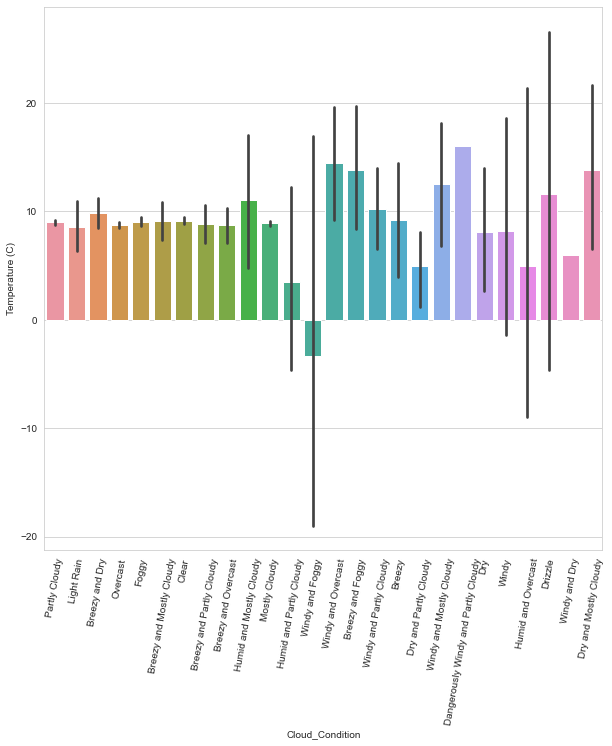

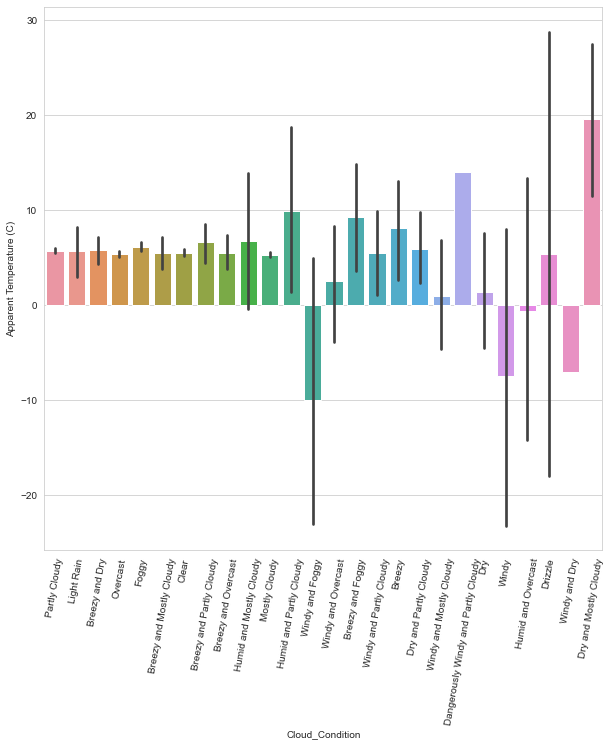

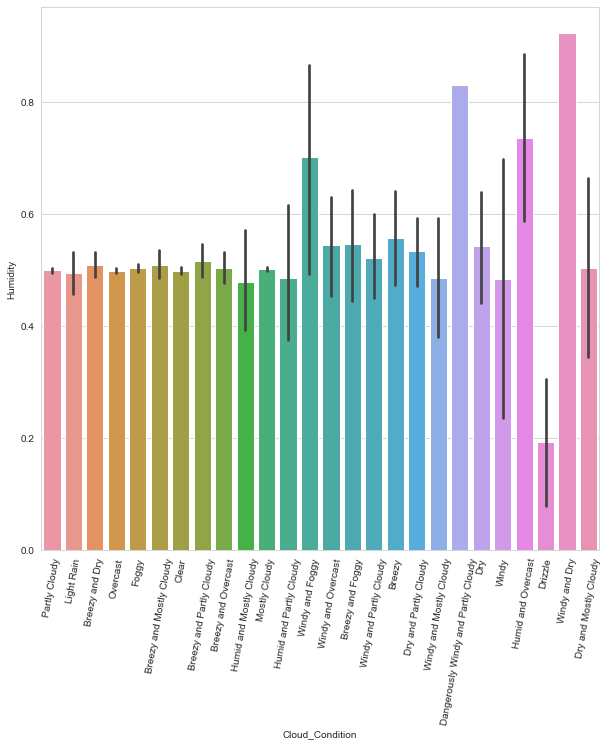

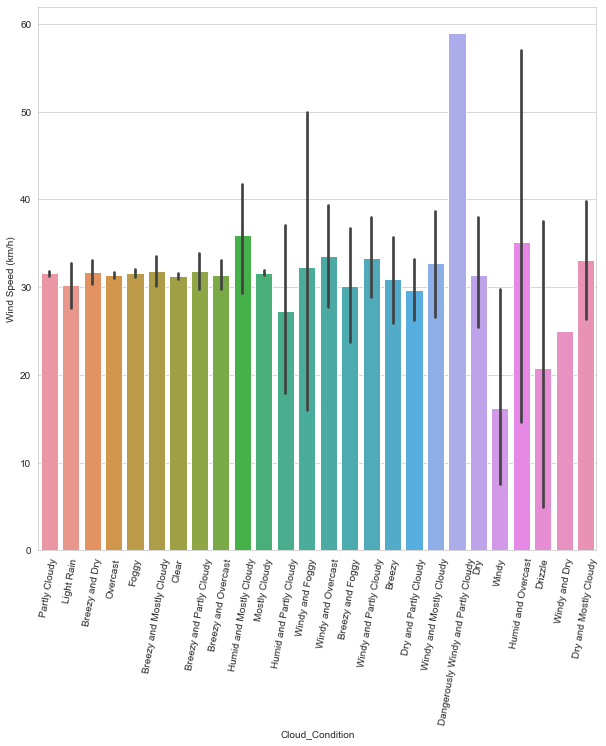

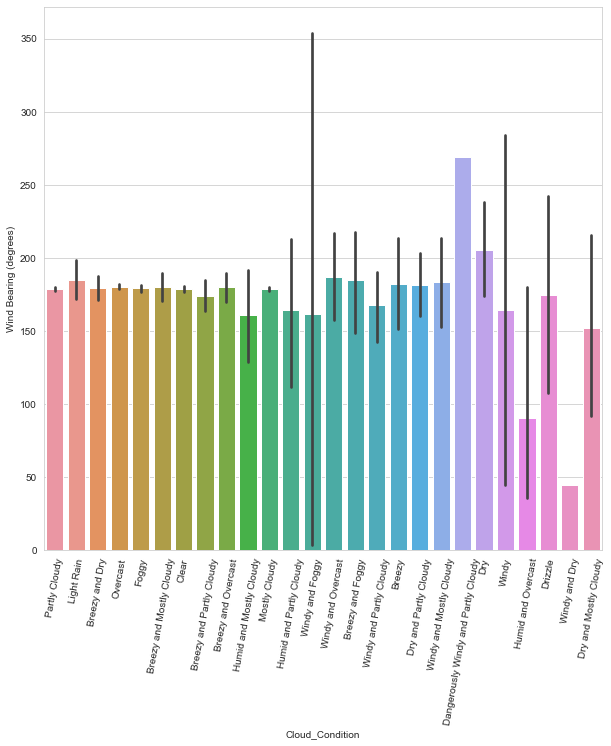

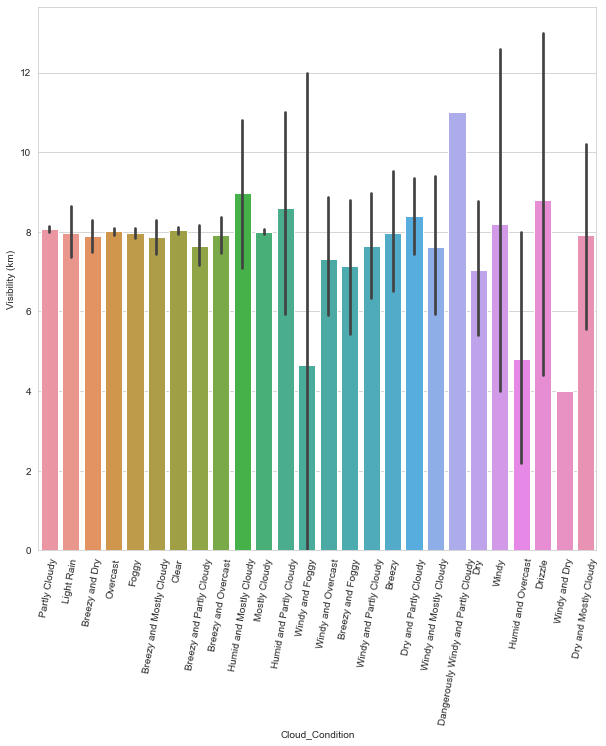

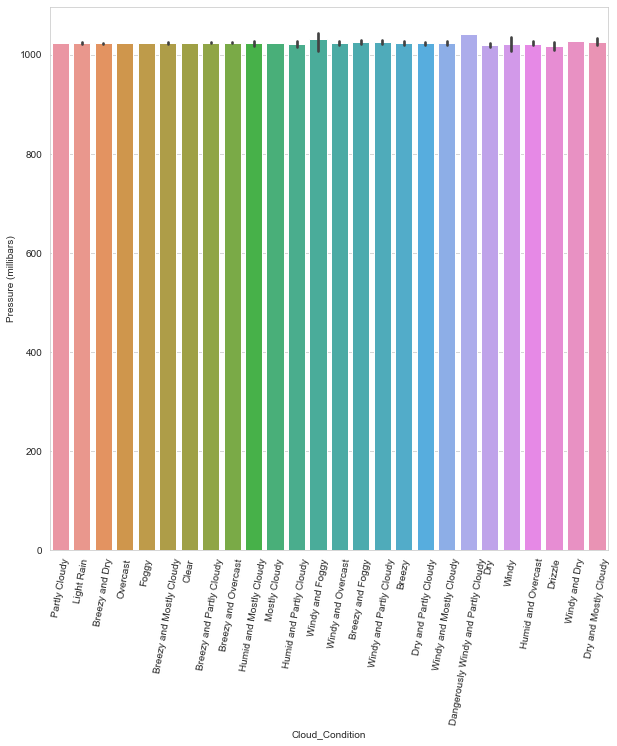

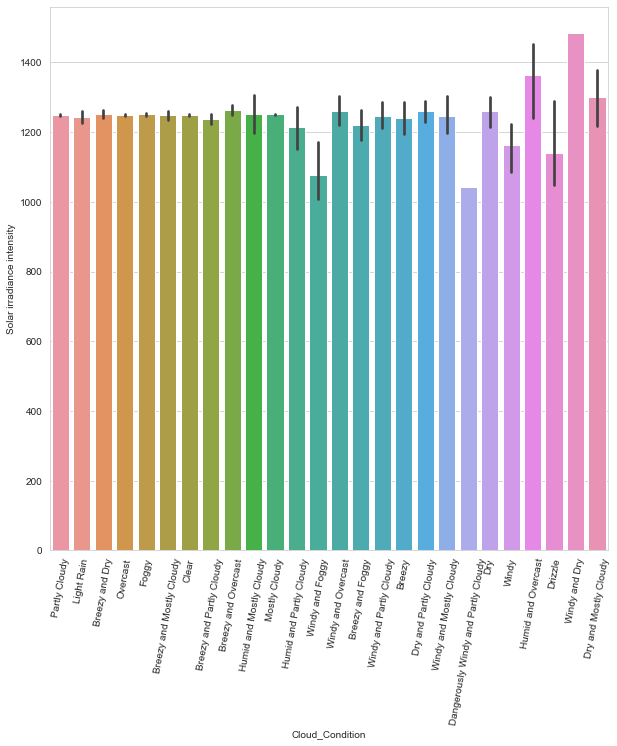

In [22]:
for col in column:
    sns.set_style('whitegrid') 
    plt.figure(figsize=(10,10))
    sns.barplot(x=data['Cloud_Condition'], y=data[col])
    plt.xticks(rotation=80)
    plt.show()

<AxesSubplot:xlabel='Rain_OR_SNOW', ylabel='count'>

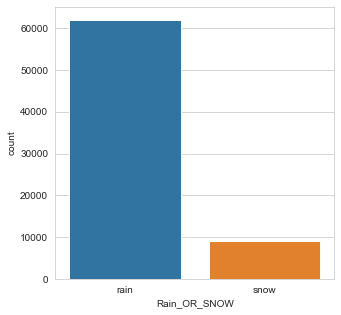

In [23]:
# Plotting for Categorical columns
plt.figure(figsize=(5,5))
sns.countplot(x=data['Rain_OR_SNOW'], data=data)

<AxesSubplot:xlabel='Condensation', ylabel='count'>

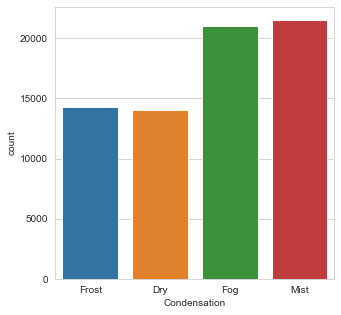

In [24]:
plt.figure(figsize=(5,5))
sns.countplot(x=data['Condensation'], data=data)

<AxesSubplot:>

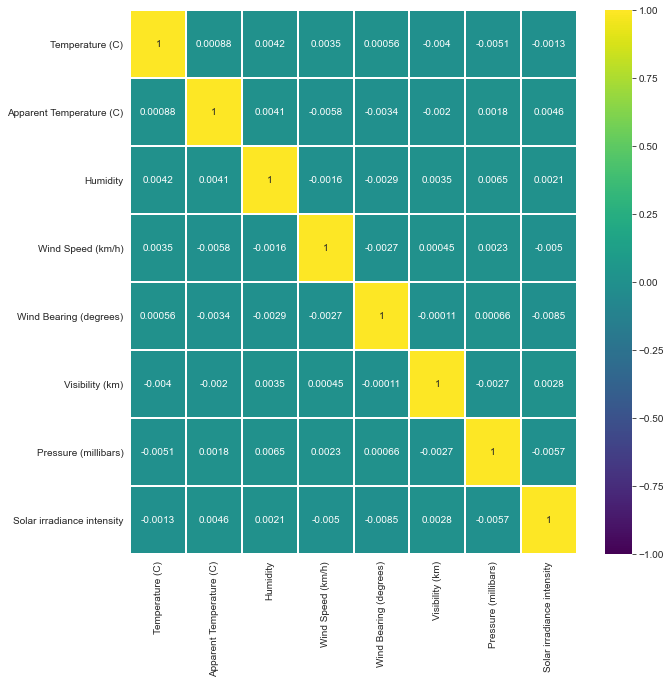

In [25]:
# Check for correlation
# Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, linewidths=-1, cmap='viridis')

### From above graph we can say the columns are not correlated to each other nor to target variable

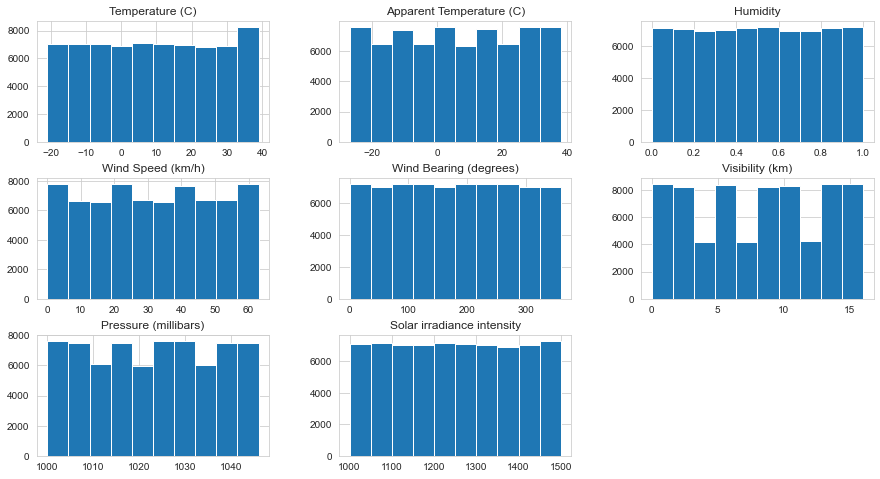

In [26]:
#lets check for numeric columns with histogram plot
plt.rcParams['figure.figsize']=(15,8)
data.hist()
plt.show()

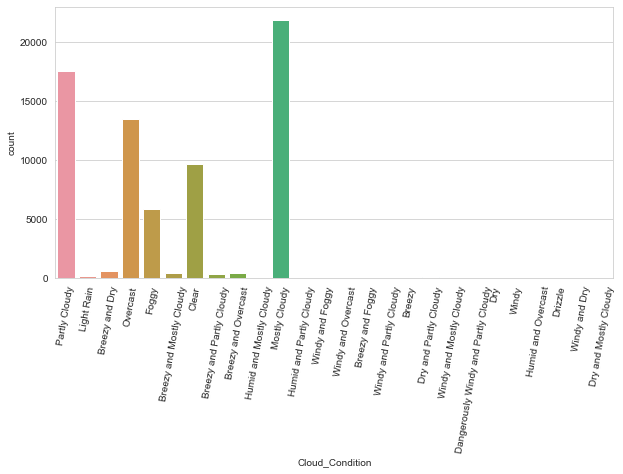

In [27]:
# Analyse Target variable
plt.rcParams['figure.figsize']=(10,5)
sns.countplot(x=data['Cloud_Condition'])
plt.xticks(rotation=80)
plt.show()

In [28]:
# Separating the categorical and numeric value

In [29]:
num= data.select_dtypes(np.number)

In [30]:
num.columns

Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)', 'Solar irradiance intensity'],
      dtype='object')

In [31]:
#num.drop('Cloud_Condition', axis=1, inplace=True)

In [32]:
#num.drop('Apparent Temperature (C)', axis=1, inplace=True)

### Label Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
target= lb.fit_transform(data['Cloud_Condition'])


In [34]:
pressure=data['Pressure (millibars)']
pressure= pressure/1000

In [35]:
#num_col= num.columns
num.head(2)

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Solar irradiance intensity
0,-13.0,-19.0,0.134364,17.0,68.0,4.0,1008.0,1068
1,15.0,5.0,0.847434,8.0,291.0,2.0,1036.0,1291


In [36]:
# Normalise the data

In [37]:
from sklearn.preprocessing import Normalizer
nor = Normalizer()
nor_col = nor.fit_transform(num)
nor_col= pd.DataFrame(nor_col, columns =num.columns)
nor_col

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Solar irradiance intensity
0,-0.008841,-0.012921,0.000091,0.011561,0.046245,0.002720,0.685517,0.726321
1,0.008924,0.002975,0.000504,0.004760,0.173135,0.001190,0.616385,0.768102
2,0.018850,-0.006855,0.000436,0.018279,0.018279,0.004570,0.573494,0.818543
3,0.017207,0.020648,0.000146,0.008604,0.074564,0.001721,0.582746,0.808732
4,0.015698,0.017442,0.000288,0.036628,0.034884,0.008721,0.585470,0.808727
...,...,...,...,...,...,...,...,...
70933,0.023475,0.018660,0.000147,0.011437,0.208870,0.008427,0.609757,0.763851
70934,0.004989,0.002494,0.000569,0.000624,0.062984,0.004989,0.642935,0.763290
70935,0.015582,-0.012243,0.000276,0.001113,0.082920,0.003896,0.574317,0.814172
70936,-0.009780,-0.001834,0.000479,0.026895,0.162593,0.006724,0.622867,0.764678


In [38]:
cat= data.select_dtypes('object')
cat.drop('Cloud_Condition', axis=1, inplace=True)

In [39]:
cat_col= pd.get_dummies(cat)

In [40]:
cat_col.head(2)

,Rain_OR_SNOW_rain,Rain_OR_SNOW_snow,Condensation_Dry,Condensation_Fog,Condensation_Frost,Condensation_Mist
0,1,0,0,0,1,0
1,1,0,0,0,1,0


In [41]:
data_new= pd.concat([cat_col, num], axis=1)

In [42]:
data_new.shape

(70938, 14)

In [43]:
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
samp = RepeatedEditedNearestNeighbours()

In [44]:
x,y= samp.fit_resample(data_new, target)

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=0)

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [75]:
from catboost import CatBoostClassifier
cat_boost= CatBoostClassifier(custom_loss=['Accuracy'])

In [76]:
cat_boost = CatBoostClassifier(eval_metric='Accuracy',
use_best_model=True,  random_seed=42)

In [77]:
cat_boost.fit(x_train, y_train, eval_set=(x_test, y_test))

Learning rate set to 0.107527
0:	learn: 0.6576355	test: 0.5980392	best: 0.5980392 (0)	total: 15.5ms	remaining: 15.4s
1:	learn: 0.6539409	test: 0.5931373	best: 0.5980392 (0)	total: 29ms	remaining: 14.5s
2:	learn: 0.6502463	test: 0.5980392	best: 0.5980392 (0)	total: 42ms	remaining: 13.9s
3:	learn: 0.6502463	test: 0.5980392	best: 0.5980392 (0)	total: 54.6ms	remaining: 13.6s
4:	learn: 0.6490148	test: 0.5980392	best: 0.5980392 (0)	total: 67ms	remaining: 13.3s
5:	learn: 0.6465517	test: 0.5980392	best: 0.5980392 (0)	total: 79.8ms	remaining: 13.2s
6:	learn: 0.6453202	test: 0.5980392	best: 0.5980392 (0)	total: 87.8ms	remaining: 12.5s
7:	learn: 0.6465517	test: 0.5980392	best: 0.5980392 (0)	total: 101ms	remaining: 12.5s
8:	learn: 0.6465517	test: 0.5980392	best: 0.5980392 (0)	total: 114ms	remaining: 12.6s
9:	learn: 0.6465517	test: 0.5980392	best: 0.5980392 (0)	total: 128ms	remaining: 12.7s
10:	learn: 0.6453202	test: 0.5980392	best: 0.5980392 (0)	total: 140ms	remaining: 12.6s
11:	learn: 0.6453202	t

In [78]:
from catboost import cv

In [79]:
cat_pred= cat_boost.predict(x_test)

In [80]:
accuracy_score(y_test, cat_pred)

0.6225490196078431

In [81]:
test= pd.read_csv('C:/Users/Sanjay/Downloads/test_CloudCondition.csv')

In [82]:
test.head(3)

,Day,Rain_OR_SNOW,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Condensation,Solar irradiance intensity
0,80002,rain,1.0,0.0,0.078150,17.0,300,10.0,1029.0,Fog,1399
1,80003,rain,-3.0,25.0,0.653251,25.0,322,0.0,1009.0,Dry,1468
2,80004,rain,18.0,17.0,0.930970,37.0,330,12.0,1045.0,Dry,1152


In [83]:
def stats(test):
    stats= pd.DataFrame(test.dtypes, columns=['Type'])
    stats['Missing_value']= test.isnull().sum().values
    stats['Unique_value']= test.nunique().values
    stats=stats.reset_index()
    return stats
    

In [84]:
stats(test)

,index,Type,Missing_value,Unique_value
0,Day,int64,0,16452
1,Rain_OR_SNOW,object,0,2
2,Temperature (C),float64,0,164
3,Apparent Temperature (C),float64,0,166
4,Humidity,float64,0,16385
5,Wind Speed (km/h),float64,0,165
6,Wind Bearing (degrees),int64,0,360
7,Visibility (km),float64,0,53
8,Pressure (millibars),float64,0,150
9,Condensation,object,0,4


In [85]:
pressure1=test['Pressure (millibars)']
pressure1= pressure1/1000

In [86]:
test['Pressure (millibars)']= pressure1

In [87]:
test.head(2)

,Day,Rain_OR_SNOW,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Condensation,Solar irradiance intensity
0,80002,rain,1.0,0.0,0.078150,17.0,300,10.0,1.029,Fog,1399
1,80003,rain,-3.0,25.0,0.653251,25.0,322,0.0,1.009,Dry,1468


In [88]:
num1=test.select_dtypes(np.number)
num1.drop('Day', axis=1, inplace=True)

In [89]:
from sklearn.preprocessing import Normalizer
nor = Normalizer()
nor_col = nor.fit_transform(num1)
nor_col= pd.DataFrame(nor_col, columns =num1.columns)
nor_col

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Solar irradiance intensity
0,0.000699,0.000000,0.000055,0.011880,0.209652,0.006988,0.000719,0.977678
1,-0.001996,0.016630,0.000435,0.016630,0.214193,0.000000,0.000671,0.976506
2,0.015010,0.014176,0.000776,0.030853,0.275179,0.010006,0.000871,0.960623
3,0.031013,-0.011277,0.000732,0.046989,0.328925,0.002819,0.000960,0.942604
4,0.019746,-0.015007,0.000388,0.048970,0.236952,0.009478,0.000823,0.969923
...,...,...,...,...,...,...,...,...
16447,0.023897,0.037206,0.000395,0.010101,0.028475,0.014789,0.000932,0.998455
16448,0.020129,0.034604,0.000393,0.008266,0.016376,0.012735,0.000831,0.998948
16449,0.021825,0.043589,0.000555,0.008896,0.029708,0.015943,0.001006,0.998202
16450,0.015707,0.033405,0.000438,0.007684,0.014596,0.011750,0.000741,0.999113


In [90]:
cat1= test.select_dtypes('object')

In [91]:
cat1_new= pd.get_dummies(cat1)

In [92]:
data2= pd.concat([num1, cat1_new], axis=1)

In [93]:
data2.shape

(16452, 14)

In [94]:
test_pred= cat_boost.predict(data2)

In [95]:
np.unique(test_pred,return_counts=True)

(array([17, 18, 19], dtype=int64), array([14767,   176,  1509], dtype=int64))

In [96]:
result = lb.inverse_transform(test_pred)


In [97]:
np.unique(result,return_counts=True)

(array(['Mostly Cloudy', 'Overcast', 'Partly Cloudy'], dtype=object),
 array([14767,   176,  1509], dtype=int64))

In [98]:
indexes = pd.read_csv('C:\\Users\\Sanjay\\Desktop\\New folder\\Hackaton\\test_CloudCondition.csv')
index = indexes.Day
result_upload1 = pd.DataFrame(result,columns=['Cloud_Condition'],index=index)
result_upload1.to_csv('C:\\Users\\Sanjay\\Desktop\\New folder\\Hackaton\\test_CloudCondition.csv')